**Loading a Dataset from the Google Drive to Google Colab**









In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

*Importing* libraries to read the .csv file

In [ ]:
import pandas as pd
import numpy as np

[texte du lien](https://)current working directory is /datasetMathAI

In [ ]:
df = pd.read_csv('/content/drive/My Drive/datasetMathAI/heart.csv')
sample1=pd.read_csv('/content/drive/My Drive/datasetMathAI/sample1.csv')
sample2=pd.read_csv('/content/drive/My Drive/datasetMathAI/sample2.csv')
sample1=sample1.drop('Unnamed: 0', axis=1)
sample2=sample2.drop('Unnamed: 0', axis=1)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.head(5)

In [ ]:
#type of each column
df.dtypes

In [ ]:
df['ca'].unique()
#4 ?????

In [ ]:
df.loc[df['ca'] == 4]

In [ ]:
print(sum(df['ca'] == 4))
#18 rows

In [ ]:
df['thal'].unique()
#3 ?????

In [ ]:
print(sum(df['thal'] == 3))
#410 rows

In [ ]:
#delete rows
df = df[ (df['ca'] != 4) & (df['thal'] != 3)]

In [ ]:
df['ca'].unique()

In [ ]:
df.shape

In [ ]:
#we use this later
#cols_to_scale=['age','trestbps','chol','thalach','oldpeak']
#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler()
#df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.color_palette("mako", as_cmap=True)


In [ ]:
sns.set_palette("Paired")

In [ ]:
df2 = df[df.isnull()== False]
df2.isnull().sum()

# Looping through all the features 

features = ['sex', 'cp', 'fbs', 'restecg','exang','slope','ca','thal']

for f in features:
    sns.countplot(x = f, data = df)
    plt.show()

# Looping through all the features by our y variable - see if there is relationship

features = ['sex', 'cp', 'fbs', 'restecg','exang','slope','ca','thal']

for f in features:
    sns.countplot(x = f, data = df, hue = 'target')
    plt.show()

In [ ]:
df.duplicated().sum()

# **sampling, descriptive statistics**

In [ ]:
df['target'].value_counts()

In [ ]:
import statistics as stats
import math

In [ ]:
sample1=pd.read_csv('/content/drive/My Drive/datasetMathAI/sample1.csv')
sample2=pd.read_csv('/content/drive/My Drive/datasetMathAI/sample2.csv')
sample1.head(1)

In [ ]:
#Sampling without Replacement 
#dropping duplicates so there's no biased values and we are left with distinct rows
listVar = ['age','sex','cp','fbs','restecg','exang','slope','ca','thal','trestbps','chol','thalach','oldpeak']
listVarQuant = ['age','trestbps','chol','thalach','oldpeak']
listVarQualt = ['sex','cp','fbs','restecg','exang','slope','ca','thal']


In [ ]:
df[listVarQuant].describe()

In [ ]:
 #Mesures of variability 
#Standard deviation is useful when comparing the spread of two separate data sets that have approximately the same mean
def populationVariance(data): 
  N = len(data)
  variance = []
  for feature in listVarQuant :
    mean = stats.mean(data[feature])
    deviations = [(x - mean) ** 2 for x in data[feature]]
    variance.append(sum(deviations) / N)
  return variance
def sampleVariance(data): 
  n = len(data)
  variance = []
  for feature in listVarQuant :
    mean = stats.mean(data[feature])
    deviations = [(x - mean) ** 2 for x in data[feature]]
    variance.append(abs(sum(deviations) / n-1))
  return variance
  


In [ ]:
df[listVarQuant].describe()

In [ ]:
varianceFrame = pd.DataFrame([populationVariance(df),sampleVariance(sample1),
                             sampleVariance(sample2)],
    columns = ['age','trestbps','chol','thalach','oldpeak'],
    index = ['original dataset','sample1','sample2']
)
varianceFrame

In [ ]:
def stddeviation(Variance):
  stddev = []
  for feature in range(len(Variance)) :
    stddev.append(math.sqrt(Variance[feature]))
  return stddev

In [ ]:
stddev0=stddeviation(populationVariance(df))
stddev1=stddeviation(sampleVariance(sample1))
stddev2=stddeviation(sampleVariance(sample2))
stddeviation = pd.DataFrame([stddev0,stddev1,stddev2],
    columns = ['age','trestbps','chol','thalach','oldpeak'],
    index = ['original dataset','sample1','sample2']
)
stddeviation


In [ ]:
def approxError(population,sample):
  approxError = []
  sumError = 0
  for i in range(len(sample)) :
    sumError += abs(population[i] - sample[i])/population[i]
    approxError.append(str(round(sumError,7))+'%')
  approxError.append(str(round(sumError/5,7))+'%')  
  return approxError


In [ ]:
approxError1 = approxError(stddev0,stddev1)
approxError2 = approxError(stddev0,stddev2)
approxError = pd.DataFrame([approxError1,approxError2],
    columns = ['age','trestbps','chol','thalach','oldpeak','general error'],
    index = ['sample1','sample2']
)
approxError

In [ ]:
import math
def coeff_var(variance, data):
  listCoefVar =[]
  for fvar, fmean in zip(range(len(variance)), listVarQuant ):
    coeff_var = math.sqrt(variance[fvar])/stats.mean(data[fmean])*100
    listCoefVar.append(coeff_var)
  return listCoefVar



In [ ]:
populationCoeff = coeff_var(populationVariance(df),df)
sample1Coeff = coeff_var(sampleVariance(sample1),sample1)
sample2Coeff = coeff_var(sampleVariance(sample2),sample2)
tableCoefVar = pd.DataFrame([populationCoeff,sample1Coeff,sample2Coeff],
    columns = ['age','trestbps','chol','thalach','oldpeak'],
    index = ['population','sample1','sample2']
)
tableCoefVar

# **graphes**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#afficher le nombre d’observations dans chaque colonne catégoriel à l’aide de barres.
fig, ax = plt.subplots(2,4,figsize=(20,10))
l=0
c=0
d=0
for l in range(2):
  for c in range(4):
    sns.countplot(ax=ax[l,c],x=listVarQualt[d], data=sample1,palette=['peru',"firebrick","maroon","darkred"])
    d=d+1
  

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sample1.groupby('sex').age.plot(kind='kde')
plt.legend(['female','male'])


In [ ]:
#df.groupby(['cp']).sum().plot(kind='pie', y='target')

In [ ]:
sns.displot(data=sample1, x='age',y='sex',col='target', kind="kde",color='sienna')


In [ ]:
#distribution of each quantative feature in relation with population
rows, cols = 3,3
fig, axarr = plt.subplots(rows, cols, figsize=(cols*5, rows*3))
for row in range(rows):
    for col in range(cols):
        ax = axarr[row, col]
        sns.distplot(sample1[listVarQuant[row+col]], ax=ax,color='sienna')
#normal distribution for: age, trestbps and almost for chol
#oldpeak is left-skewed
#thalac is right-skewed


In [ ]:
fig, ax = plt.subplots(2,1,figsize=(10,10)) 
#covariance matrix
cov=sample1[listVarQuant].cov()
#, print(cov)
sns.heatmap(cov, annot=True, fmt='g', xticklabels=listVarQuant, yticklabels=listVarQuant, cmap='YlGnBu',ax=ax[0])
plt.title('sample covariance matrix')

                                                                         
#population
cov=df[listVarQuant].cov()
sns.heatmap(cov, annot=True, fmt='g', xticklabels=listVarQuant, yticklabels=listVarQuant, cmap='YlGnBu',ax=ax[1])
plt.title('population covariance matrix')
plt.show()
#np.cov(df['age'],df['trestbps'],df['chol'],df['thalach'],df['oldpeak'])

In [ ]:
#correlation coefficient of Pearson(r)
fig = plt.subplots(figsize=(7,6)) 
sns.heatmap(sample1[listVarQuant].corr(), annot=True, fmt='g', xticklabels=listVarQuant, yticklabels=listVarQuant, cmap='YlGnBu')
plt.show()

In [ ]:
#corr
#coefficient de correlation de Pearson(r)
fig = plt.subplots(figsize=(7,6)) 
sns.heatmap(sample1[listVarQuant].corr(), annot=True, fmt='g', xticklabels=listVarQuant, yticklabels=listVarQuant, cmap='YlGnBu')
plt.show()
#f, ax = plt.subplots(figsize =(9, 8))
#sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.01)

In [ ]:
#low correlation, indépendance lineaire

In [ ]:
datareg=sample1
fig, ax = plt.subplots(4,4,figsize=(20,13))
fig.suptitle('linear regression')

sns.regplot(ax=ax[0,0],y='age', x='trestbps', data=datareg,color='firebrick',marker='x')
sns.regplot(ax=ax[0,1],y='age', x='chol', data=datareg,color='firebrick',marker='x')
sns.regplot(ax=ax[0,2],y='age', x='thalach', data=datareg,color='firebrick',marker='x')
sns.regplot(ax=ax[0,3],y='age', x='oldpeak', data=datareg,color='firebrick',marker='x')

sns.regplot(ax=ax[1,1],y='trestbps', x='chol', data=datareg,color='firebrick',marker='x')
sns.regplot(ax=ax[1,2],y='trestbps', x='thalach', data=datareg,color='firebrick',marker='x')
sns.regplot(ax=ax[1,3],y='trestbps', x='oldpeak', data=datareg,color='firebrick',marker='x')

sns.regplot(ax=ax[2,2],y='chol', x='thalach', data=datareg,color='firebrick',marker='x')
sns.regplot(ax=ax[2,3],y='chol', x='oldpeak', data=datareg,color='firebrick',marker='x')

sns.regplot(ax=ax[3,3],y='thalach', x='oldpeak', data=datareg,color='firebrick',marker='x')


#correlation lineaire
#fig, ax = plt.subplots(5,5,figsize=(25,20))
#listVarQuant
#c=0
#d=0
#for f in listVarQuant:
  #for j in listVarQuant[0:(c)]:
    #sns.regplot(ax=ax[c,d], x=f, y=j, data=df, color='firebrick',marker='x')
    #d=d+1
  #c=c+1
  #d=0


In [ ]:
colAge=df['age']
colTarget=df['target']

In [ ]:
t1=colTarget==1
t0=colTarget==0

In [ ]:
t1Age=colAge[t1].dropna()
t0Age=colAge[t0].dropna()

In [ ]:
import scipy.stats as st
st.f_oneway(,)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model=ols('age ~ target', data=df).fit()
anovaResult=sm.stats.anova_lm(model, typ=2)
print(anovaResult)


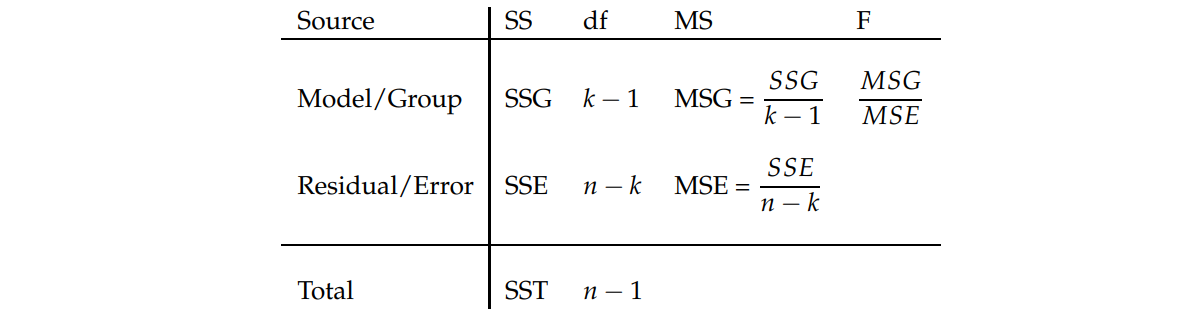

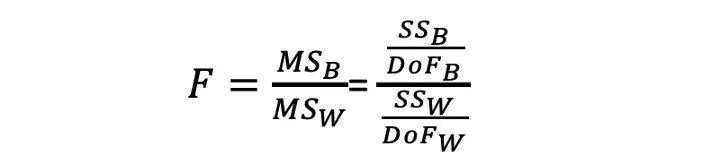

In [ ]:

len(sample1[sample1.target == 0]['age'])
len(sample1[sample1.target == 1]['age'])

The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

The samples are independent.

Each sample is from a normally distributed population.

The population standard deviations of the groups are all equal. This property is known as homoscedasticity.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('age ~ C(target)', data=sample1).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

In [ ]:
sample1=pd.read_csv('/content/drive/My Drive/datasetMathAI/sample1.csv')
sample1=sample1.drop('Unnamed: 0', axis=1)

In [ ]:
n = len(sample1)
k = len(sample1['target'].unique())
samplesize_target0 =  len(sample1[sample1.target == 0]['age'])
samplesize_target1 =  len(sample1[sample1.target == 1]['age'])
# Calculate Means 
mean_target0 = sample1[sample1.target == 0]['age'].mean()
mean_target1 = sample1[sample1.target == 1]['age'].mean()
mean_overall = sample1['age'].mean()

# Calculate Variances 
var_target0 = sample1[sample1.target == 0]['age'].var()
var_target1 = sample1[sample1.target == 1]['age'].var()

# the sum of the squared deviations of the sample averages from the overall average, weighted by the size of the samples
SSG = samplesize_target0 * (mean_overall - mean_target0)**2 + \
      samplesize_target1 *(mean_overall - mean_target1)**2 

#the sum of the squared deviations within samples from the sample averages
SSE = (samplesize_target0 - 1) * var_target0 + \
      (samplesize_target1 - 1) * var_target1 

#total squared deviation (from the average)
SST = SSE + SSG

# Degrees of Freedom 
dof_SSG = k - 1
dof_SSE = n - k
dof_SST = n - 1 
#
MSG = (SSG/dof_SSG)
MSE = (SSE/dof_SSE)

# F Stastics 
f_stat = MSG / MSE

tableAnova_agetarget = pd.DataFrame([[round(SSG,4),dof_SSG,round(MSG,4),f_stat],[SSE,dof_SSE,MSE,''],[SST,n-1,'','']],
    columns = ['SS','df','MS','f-statistic'],
    index = ['Group','Error','Total']
)
tableAnova_agetarget

https://stattrek.com/online-calculator/f-distribution
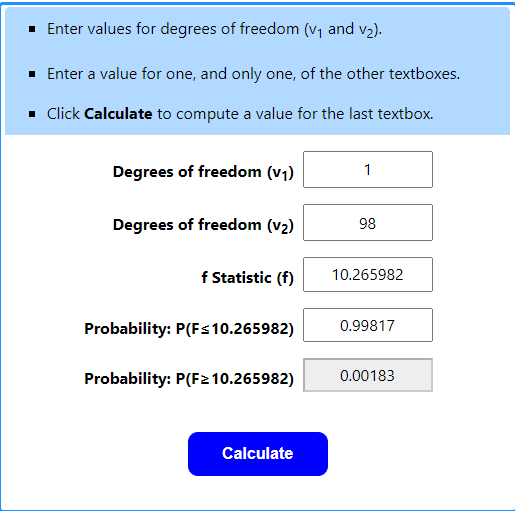

In [ ]:
#statistically significant, null hypothesis rejected 

In [ ]:
sns.set_style("white")
plt.figure(figsize=(11, 6))
labels=['no','yes']
for num in sample1['target'].unique():
  sns.distplot(sample1[sample1.target == num].age, kde_kws=dict(linewidth=3),label=labels[num])
    
plt.legend(title=' diagnosis of heart disease \n(angiographic disease status)', fontsize=13,loc="upper left")
plt.xlabel('age', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [ ]:
cols_to_scale=['age','trestbps','chol','thalach','oldpeak']
from sklearn import preprocessing
from sklearn.decomposition import PCA

scaler_data=preprocessing.scale(df[cols_to_scale])

In [ ]:
scaler_data
#matrice ((x-u)/v)

In [ ]:
#prendre 3 variables importante depuis les 5
pca=PCA(n_components=3)
pca.fit(scaler_data)
pca_data=pca.transform(scaler_data)

In [ ]:
pca_data

In [ ]:
#features importance
per_var=np.round(pca.explained_variance_ratio_*100, decimals=2)
per_var

In [ ]:
pcomponnts=['age', 'trestbps', 'chol']

In [ ]:
labels=['PC'+str(x) for x in range(1,len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels,color='sienna' )
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
import plotly.express as px

#df = px.data.df()
fig = px.scatter_matrix(
    pca_data,
    labels=per_var,
    dimensions=(range(3)),
    color=df["target"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
cov_matrix=np.matmul(scaler_data.T,scaler_data)
cov_matrix

In [ ]:
from scipy.linalg import eigh
values, vectors=eigh(cov_matrix)
values

In [ ]:
vectors

In [ ]:
pcs = pd.DataFrame(list(zip(pca_data[:,0], pca_data[:,1], pca_data[:,2], df['target'])),columns =['pc1', 'pc2', 'pc3', 'target']) 
fig = px.scatter_3d(pcs, x='pc1', y='pc2', z='pc3',color='target')
fig.show()

In [ ]:

def plot_correlation_circle(pc1, pc2):    
    fig, ax = plt.subplots(figsize=(16, 10))

    for i in range(X.shape[1]):
        x = np.corrcoef(pc1,X[X.columns[i]])[0,1]
        y = np.corrcoef(pc2,X[X.columns[i]])[0,1]
        ax.annotate("", xy= (x,y), xytext=(0, 0),arrowprops=dict(arrowstyle="->"))
        ax.annotate(X.columns[i], (x+0.02,y+0.02), size=12)


    ax.set_title('Correlation circle')
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")

    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))
    plt.axis('equal')
    plt.show()
    
plot_correlation_circle(pc1,pc2)